# **Text Classification using LSTM**
Text classification using LSTM (Long Short-Term Memory) RNNs is an advanced approach for categorizing text data, such as identifying spam messages in an SMS dataset. In traditional methods, models like Naive Bayes or Logistic Regression may classify texts based on word frequencies or embeddings, but these approaches often fail to capture sequential patterns in the text. LSTM, a variant of Recurrent Neural Networks (RNN), is designed to overcome this limitation by preserving information over time, making it highly effective for understanding sequential data such as text.

In the context of the SMS dataset, which includes labeled "ham" (non-spam) and "spam" messages, LSTM models are particularly useful for capturing the dependencies between words or phrases in each message. Unlike standard RNNs, LSTM incorporates gates (input, forget, and output) that help retain or discard information at different time steps, allowing the model to focus on the relevant context of the message while ignoring irrelevant parts.

The dataset consists of short text messages, which makes LSTM an ideal model, as it can identify patterns in the order of words and phrases that contribute to distinguishing between spam and non-spam messages. The LSTM model processes each message word by word, and by the end of the sequence, it produces a feature representation that helps classify whether the message is spam or ham. This method leverages the model’s ability to capture long-term dependencies in text, leading to more accurate predictions than traditional models.

# **About Dataset**
The dataset consists of SMS messages categorized into two classes: "ham" (non-spam) and "spam" (unsolicited or unwanted messages). It contains two primary columns: the first column (`v1`) holds the labels indicating whether a message is "ham" or "spam," and the second column (`v2`) contains the actual text of the messages. Additionally, there are three unnamed columns that contain only missing or `NaN` values, which are likely irrelevant for the analysis and can be removed. This dataset is commonly used in tasks like spam detection, where models are trained to classify SMS messages based on their content.

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Text(0.5, 1.0, 'Number of ham and spam messages')

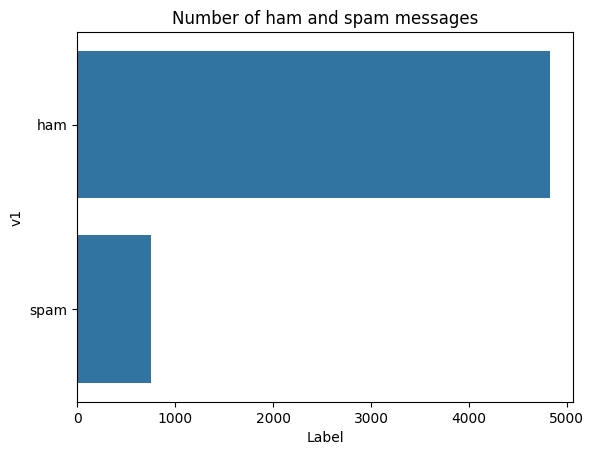

In [ ]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')



---



---


In this code, the SMS dataset is being prepared for text classification. The variable `X` is assigned the text messages from the column `v2` of the DataFrame `df`, representing the features of the dataset. Meanwhile, `Y` is assigned the labels from the column `v1`, which contain the categories "ham" (non-spam) or "spam" (spam).

Next, the `LabelEncoder()` from scikit-learn is used to convert the categorical labels in `Y` into numeric values. Since machine learning models work with numbers, this step is crucial for transforming the text labels into a numerical format. Specifically, "ham" and "spam" are encoded as integers (usually `0` for ham and `1` for spam). The encoded labels are then stored in `Y`.

Finally, the code reshapes the `Y` array into a 2D array using `Y.reshape(-1, 1)`, where `-1` automatically calculates the appropriate number of rows, and `1` sets a single column. This reshaping is typically done to ensure the labels have the correct shape for input into machine learning models, especially when they expect two-dimensional data.


---



---



In [ ]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)



---



---


In this code, text data is being preprocessed to prepare it for input into a machine learning model, specifically for an LSTM model used in text classification. The goal is to convert the raw text messages into a structured numerical format that the model can understand.

First, `max_words = 1000` limits the tokenizer to use only the top 1,000 most frequent words from the text dataset. This helps the model focus on the most important words, improving efficiency and reducing noise from infrequent words. `max_len = 150` sets the maximum length of each text sequence to 150 words. If a message is longer than 150 words, it will be truncated, and if it's shorter, it will be padded with zeros.

Next, a `Tokenizer` object is created with `num_words=max_words`, which means it will tokenize the text into individual words and keep track of the top 1,000 words. The `fit_on_texts(X_train)` method builds the tokenizer based on the training data, `X_train`, by creating a word index, mapping each word to a unique integer.

Then, `texts_to_sequences(X_train)` converts the actual text data into sequences of integers, where each word in a message is replaced by its corresponding integer based on the tokenizer's word index.

Finally, `pad_sequences(sequences, maxlen=max_len)` ensures that all the sequences have the same length by either padding shorter sequences with zeros or truncating longer ones to a maximum length of 150 words. This is essential because neural networks require input data to have a fixed shape. The resulting `sequences_matrix` is a 2D array where each row corresponds to a padded or truncated sequence of integers representing a text message.



---


---



In [ ]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)



---



---


The `RNN()` function defines a deep learning model for text classification, using an LSTM (Long Short-Term Memory) network. The model starts with an **input layer** that accepts sequences of integers, where each sequence represents a text message of fixed length (`max_len`, set to 150 words). Next, an **embedding layer** transforms these word indices into 50-dimensional dense vector representations, capturing semantic relationships between words.

The core of the model is the **LSTM layer**, which has 64 units (memory cells). This layer processes the input sequence to capture dependencies between words, making it well-suited for sequential data like text, where the order of words matters.

Following the LSTM, a **Dense (fully connected) layer** with 256 neurons is applied, which is used to learn more abstract representations of the features extracted by the LSTM. A **ReLU (Rectified Linear Unit) activation function** is used here to introduce non-linearity, allowing the model to capture complex patterns in the data.

To prevent overfitting, a **Dropout layer** is applied with a dropout rate of 0.5, which means 50% of the neurons are randomly set to zero during training. This forces the model to generalize better by not relying too heavily on specific neurons.

Finally, the model includes an **output layer** with one neuron and a **sigmoid activation function**, which is typical for binary classification problems (e.g., distinguishing between "spam" and "ham"). The output of this layer will be a value between 0 and 1, representing the probability that a given message belongs to one class (e.g., spam).

The function returns this compiled model, which is ready to be trained on a text classification task.



---



---



In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model



---



---
The output provided is a summary of the architecture of an LSTM model, showing the layers, their shapes, and the number of parameters that need to be trained. Here's a detailed explanation:

- **Input Layer (`inputs`)**: The input layer expects sequences of length 150, represented as `(None, 150)`, where `None` indicates that the batch size can vary. This layer does not have any trainable parameters because it's just a placeholder for the input data.

- **Embedding Layer (`embedding`)**: This layer converts each word (represented as an integer) into a 50-dimensional vector, resulting in an output shape of `(None, 150, 50)` — 150 words, each mapped to a 50-dimensional vector. The embedding layer has 50,000 trainable parameters, calculated as `max_words * embedding_dim = 1000 * 50`.

- **LSTM Layer (`lstm`)**: The LSTM layer processes the sequence of word vectors and outputs a 64-dimensional representation for the entire sequence, represented by the output shape `(None, 64)`. The LSTM has 29,440 parameters, which includes both the weights for input, hidden state, and biases.

- **Fully Connected Layer (`FC1`)**: This dense layer has 256 neurons and takes the 64-dimensional output from the LSTM as input, resulting in an output shape of `(None, 256)`. It has 16,640 trainable parameters (`64 * 256 + 256` for the weights and biases).

- **Activation Layer (`activation`)**: A ReLU activation function is applied to the output of the fully connected layer, with no trainable parameters. This layer just adds non-linearity.

- **Dropout Layer (`dropout`)**: This layer randomly sets 50% of the neurons from the previous layer to zero during training to prevent overfitting. It also has no trainable parameters and maintains the shape `(None, 256)`.

- **Output Layer (`out_layer`)**: This is the final dense layer with one neuron (output shape of `(None, 1)`), which is used for binary classification (spam vs. ham). It has 257 trainable parameters (`256 * 1 + 1` for weights and biases).

- **Activation Layer (`activation_1`)**: This is the final activation layer using the sigmoid function, which outputs a value between 0 and 1, representing the probability of the input belonging to one of the two classes. Like the previous activation layer, it has no parameters.

In total, the model has learned **96,337 parameters**, which are adjusted during training to optimize performance on the text classification task.

In the paper the output is not give so our output according to the paper is a given.


---


---




In [ ]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 150, 50)             │          50,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          29,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ FC1 (Dense)                          │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ out_layer (Dense)                    │ (None, 1)                   │             257 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,337 (376.32 KB)

 Trainable params: 96,337 (376.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 279ms/step - accuracy: 0.8287 - loss: 0.4756 - val_accuracy: 0.9114 - val_loss: 0.2254
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 388ms/step - accuracy: 0.9472 - loss: 0.1870 - val_accuracy: 0.9736 - val_loss: 0.1141
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 605ms/step - accuracy: 0.9762 - loss: 0.0902 - val_accuracy: 0.9821 - val_loss: 0.0710
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 13s 435ms/step - accuracy: 0.9850 - loss: 0.0468 - val_accuracy: 0.9821 - val_loss: 0.0666
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 17s 307ms/step - accuracy: 0.9875 - loss: 0.0458 - val_accuracy: 0.9842 - val_loss: 0.0646
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 381ms/step - accuracy: 0.9893 - loss: 0.0446 - val_accuracy: 0.9821 - val_loss: 0.0627
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 334ms/step - accuracy: 0.9932 - loss: 0.0256 - val_accuracy: 0.9768 - val_loss: 0.0740


In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
accr = model.evaluate(test_sequences_matrix,Y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9840 - loss: 0.0554


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.063
  Accuracy: 0.978
